In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patheffects as path_effects
import os

from mesagrid import Track
from mesagrid import star_plots as sp

In [2]:
colors = ['#264653', '#287271', '#2A9D8F','#E9C46A', '#F4A261', '#E76F51']
patheffects = [path_effects.Stroke(linewidth=4, foreground='white'), path_effects.Normal()]

In [3]:
track1_0 = Track(r'work/Track1_0', name='Track 1 Pre He Flash')
track1_1 = Track(r'work/Track1_1', name='Track 1-1', classical_pulsator=True)
track1_2 = Track(r'work/Track1_2', name='Track 1-2', classical_pulsator=True)
track1_3 = Track(r'work/Track1_3', name='Track 1-3', classical_pulsator=True)
track1_4 = Track(r'work/Track1_4', name='Track 1-4', classical_pulsator=True)
track1_5 = Track(r'work/Track1_5', name='Track 1-5', classical_pulsator=True)
track1_6 = Track(r'work/Track1_6', name='Track 1-6', classical_pulsator=True)

tracks1 = [track1_1, track1_2, track1_3, track1_4, track1_5, track1_6]

track2_0 = Track(r'work/Track2_0', name='Track 2 Pre He Flash')
track2_1 = Track(r'work/Track2_1', name='Track 2-1', classical_pulsator=True)
track2_2 = Track(r'work/Track2_2', name='Track 2-2', classical_pulsator=True)
track2_3 = Track(r'work/Track2_3', name='Track 2-3', classical_pulsator=True)
track2_4 = Track(r'work/Track2_4', name='Track 2-4', classical_pulsator=True)
track2_5 = Track(r'work/Track2_5', name='Track 2-5', classical_pulsator=True)
track2_6 = Track(r'work/Track2_6', name='Track 2-6', classical_pulsator=True)

tracks1 = [track1_1, track1_2, track1_3, track1_4, track1_5, track1_6]
tracks2 = [track2_1, track2_2, track2_3, track2_4, track2_5, track2_6]

# HR Diagrams

Loading Frequencies:   0%|          | 0/1500 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1364 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/2669 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1583 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1784 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1618 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1100 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1557 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1758 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1518 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1778 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1336 [00:00<?, ?it/s]

[None, None, None, None, None, None, None]

C:\Users\mkoro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\mkoro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


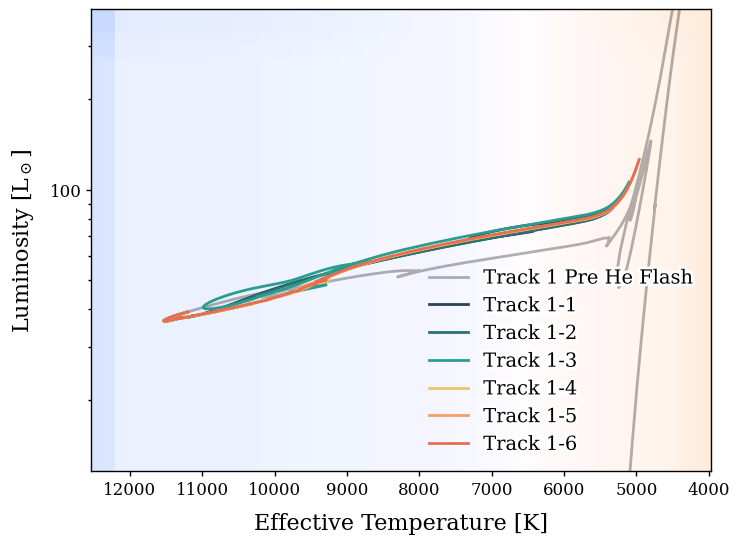

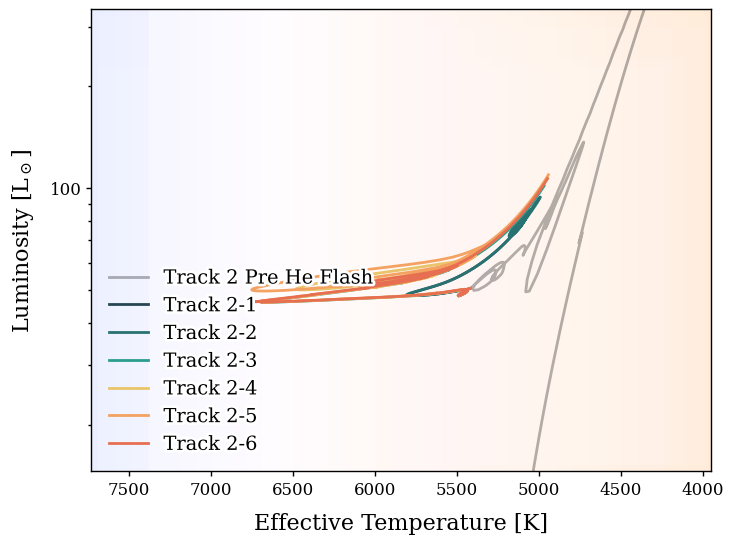

In [4]:
# First set of models (M=0.59, Z=0.001)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

sp.plot_hr(track1_0, alpha=0.3)
for i, track in enumerate(tracks1):
    sp.plot_hr(track, ax=ax, color=colors[i], alpha_colors=0.9)

ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
[text.set_path_effects(patheffects) for text in ax.legend(frameon=False).get_texts()]


# Second set of models (M=0.63, Z=0.002)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

sp.plot_hr(track2_0, alpha=0.3)
for i, track in enumerate(tracks2):
    sp.plot_hr(track, ax=ax, color=colors[i], alpha_colors=0.9)

ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
[text.set_path_effects(patheffects) for text in ax.legend(frameon=False).get_texts()]

# Kippenhahn Diagrams

Loading Profiles:   0%|          | 0/1500 [00:00<?, ?it/s]

Loading GYRE Files:   0%|          | 0/1500 [00:00<?, ?it/s]

C:\Users\mkoro\Documents\GitHub\mesagrid\mesagrid\star_plots.py:410: RuntimeWarning: divide by zero encountered in log10
  Z = np.array([sp.interpolate.interp1d(g.m/g.M, np.log10(g.N *  10**6/(2*np.pi)),


Loading Profiles:   0%|          | 0/1364 [00:00<?, ?it/s]

Loading GYRE Files:   0%|          | 0/1364 [00:00<?, ?it/s]

C:\Users\mkoro\Documents\GitHub\mesagrid\mesagrid\star_plots.py:410: RuntimeWarning: divide by zero encountered in log10
  Z = np.array([sp.interpolate.interp1d(g.m/g.M, np.log10(g.N *  10**6/(2*np.pi)),


Loading Profiles:   0%|          | 0/2669 [00:00<?, ?it/s]

Loading GYRE Files:   0%|          | 0/2669 [00:00<?, ?it/s]

C:\Users\mkoro\Documents\GitHub\mesagrid\mesagrid\star_plots.py:410: RuntimeWarning: divide by zero encountered in log10
  Z = np.array([sp.interpolate.interp1d(g.m/g.M, np.log10(g.N *  10**6/(2*np.pi)),


Loading Profiles:   0%|          | 0/1583 [00:00<?, ?it/s]

Loading GYRE Files:   0%|          | 0/1583 [00:00<?, ?it/s]

C:\Users\mkoro\Documents\GitHub\mesagrid\mesagrid\star_plots.py:410: RuntimeWarning: divide by zero encountered in log10
  Z = np.array([sp.interpolate.interp1d(g.m/g.M, np.log10(g.N *  10**6/(2*np.pi)),


Loading Profiles:   0%|          | 0/1784 [00:00<?, ?it/s]

Loading GYRE Files:   0%|          | 0/1784 [00:00<?, ?it/s]

C:\Users\mkoro\Documents\GitHub\mesagrid\mesagrid\star_plots.py:410: RuntimeWarning: divide by zero encountered in log10
  Z = np.array([sp.interpolate.interp1d(g.m/g.M, np.log10(g.N *  10**6/(2*np.pi)),


Loading Profiles:   0%|          | 0/1618 [00:00<?, ?it/s]

Loading GYRE Files:   0%|          | 0/1618 [00:00<?, ?it/s]

C:\Users\mkoro\Documents\GitHub\mesagrid\mesagrid\star_plots.py:410: RuntimeWarning: divide by zero encountered in log10
  Z = np.array([sp.interpolate.interp1d(g.m/g.M, np.log10(g.N *  10**6/(2*np.pi)),


TypeError: plot_kippenhahn_extras() takes 0 positional arguments but 1 was given

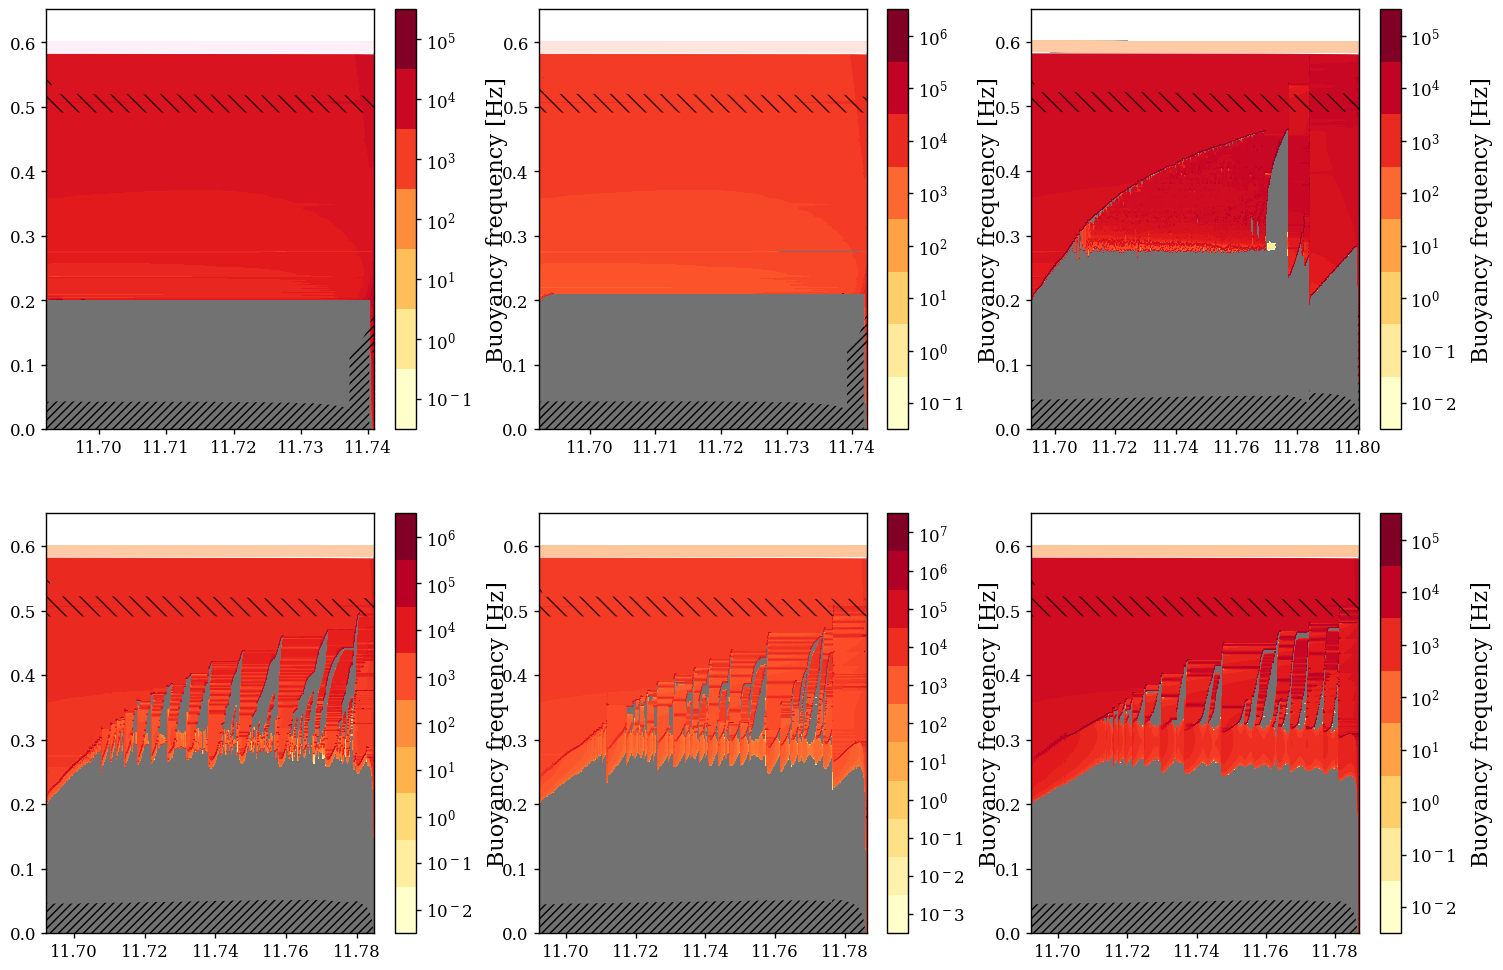

In [5]:
# First set of models (M=0.59, Z=0.001)
fig, axs = plt.subplots(2, 3, figsize=(18,12))

for i, track in enumerate(tracks1):
    sp.plot_kippenhahn(track, ax=axs.flatten()[i])

for ax_row in axs:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')

sp.plot_kippenhahn_extras(fig)


# Second set of models (M=0.63, Z=0.002)
fig, axs = plt.subplots(2, 3, figsize=(18,12))

for i, track in enumerate(tracks1):
    sp.plot_kippenhahn(track, ax=axs.flatten()[i])

for ax_row in axs:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')

sp.plot_kippenhahn_extras(fig)